## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 1.1
wiki_rfa_path = 'wiki-RfA.csv.gz'
wiki_rfa_df = pd.read_csv(wiki_rfa_path)
wiki_rfa_df.head()

unique_rfa = wiki_rfa_df['TGT'].unique()
print('number of unique RFA: ', len(unique_rfa))

# average number of votes per rfa 
number_of_vote_per_rfa = wiki_rfa_df.groupby('TGT').SRC.count()
print('average number of vote per rfa: ', number_of_vote_per_rfa.mean())

number of unique RFA:  3439
average number of vote per rfa:  48.561500436173304


In [9]:
wiki_rfa_df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no..."
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

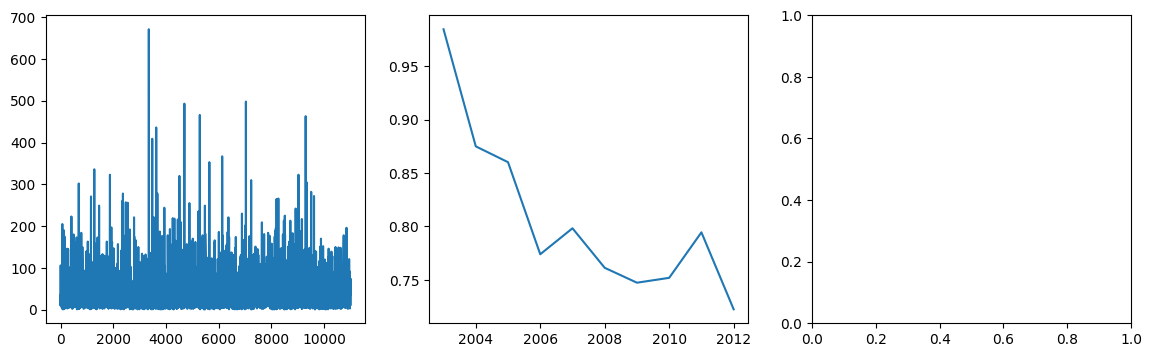

In [14]:
# 1.2 

fig, axs = plt.subplots(1,3, figsize = (14,4))

axs[0].plot(wiki_rfa_df.groupby('TGT').YEA.count())

axs[1].plot(wiki_rfa_df.groupby('YEA').VOT.apply(lambda x: np.mean(x > 0)))

axs[2].plot((wiki_rfa_df.groupby('TGT')).groupby('YEA').VOT.mean())

a) # RfA 2008: 520
b) % Positive votes: 0.7612268475384787
c) Avg. # votes per RfA: 51.60192307692308


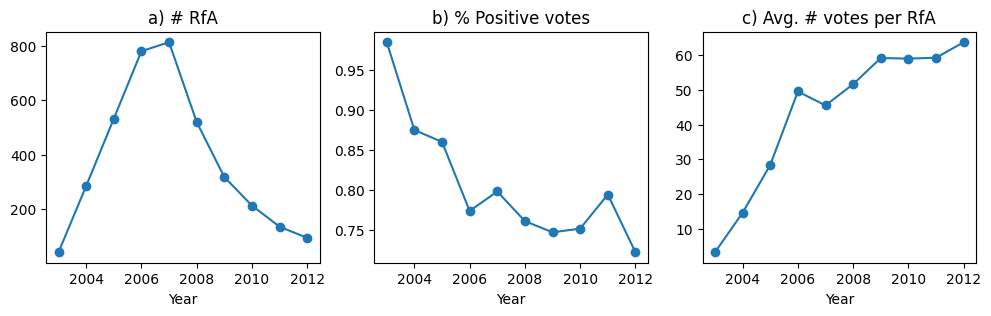

In [15]:
tmp = wiki_rfa_df.groupby(["YEA", "TGT"]).VOT

fig, axs = plt.subplots(1, 3, figsize=(12,3))

tmp_a = tmp.count().reset_index().groupby("YEA").VOT.count() 
axs[0].plot(tmp_a ) 
axs[0].scatter(tmp_a.index, tmp_a) 
axs[0].set_title("a) # RfA")
axs[0].set_xlabel("Year")
print("a) # RfA 2008:", tmp_a.loc[2008])

tmp_b = wiki_rfa_df.groupby(["YEA"]).VOT.apply(lambda x: np.mean(x > 0))
axs[1].plot(tmp_b ) 
axs[1].scatter(tmp_b.index, tmp_b) 
axs[1].set_title("b) % Positive votes")
axs[1].set_xlabel("Year")
print("b) % Positive votes:", tmp_b.loc[2008])

tmp_c = tmp.count().reset_index().groupby("YEA").VOT.mean()
axs[2].plot(tmp_c ) 
axs[2].scatter(tmp_c.index, tmp_c) 
axs[2].set_title("c) Avg. # votes per RfA")
axs[2].set_xlabel("Year")
print("c) Avg. # votes per RfA:", tmp_c.loc[2008])

**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
*YOUR ANSWER HERE*

From the above plots, there appears to be a spike in the number of admin requests in 2006-2007 (a). 
The fraction of positive votes across the years has decreased (b). 
The number of votes cast per RfA has increased (c).

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [16]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [17]:
# 1.4
print('number of nodes in the graph: ', len(G.nodes))
print('number of edges in the graph: ', len(G.edges))

number of nodes in the graph:  10831
number of edges in the graph:  161147


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Degree centrality')

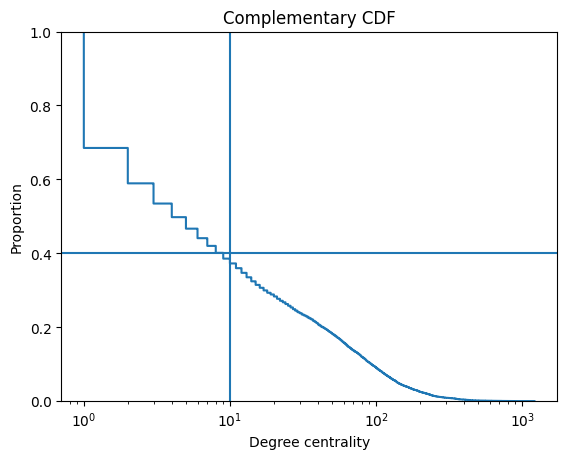

In [24]:
# 1.5

import seaborn as sns

# plot complementary cumulative distribution of degree centrality: 
sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


**A1.6**
*YOUR ANSWER HERE*

Around 40% of the users had at least degree 11. 
However, the graph counts both receiving and casting a vote as an edge.
Thus, there can be users with degree 11 that cast LESS than 11 votes.
Therefore, 40% is an upper bound and the statement is false.

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [28]:
# 1.7

# to calculate the fraction of users that had a out degree >= 11
import networkx as nx
# on passe d'un graph simple à un multigraph 
G_ = nx.from_pandas_edgelist(wiki_rfa_df, 'SRC', 'TGT', ['VOT', 'RES', 'YEA'], create_using=nx.MultiDiGraph)
# on trie les valeurs de out_degree 
tmp = sorted(dict(G_.out_degree()).values())
print('fraction of users that voted at least 11 times: ', 100 * len([t for t in tmp if t >= 11]) / len(tmp), '%')

fraction of users that voted at least 11 times:  24.863816822084758 %


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [31]:
# 2.1

# to select only a subsets of nodes 
edges_2004 = [i for i, v in nx.get_edge_attributes(G, "YEA").items() if v == 2004]
G_2004 = G.edge_subgraph(edges_2004)

# generate cliques of size between 1 and 3 (triangles) in an undirected graph 
idx = 0
tmp = []

for i in nx.enumerate_all_cliques(G_2004):
    if len(i) < 3: 
        continue
    if len(i) > 3:
        break
    idx += 1
    tmp.append(i)


print("Triangles", len(tmp))

Triangles 8448


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2**
*YOUR ANSWER HERE*

False

Cluster coefficient is a fraction of closed triangles in ego net. This says nothing about the absolute number of triangles in the ego network (i.e., the network of neighbors).


**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [33]:
# 2.3

# estimate the fraction of triangles of these configuration, tmp correspond à l'ensemble des triangles 
counter = {
    (-1, -1, -1): 0, # -3
    (-1, -1, 1):  0,  # +1-2
    (-1, 1, 1):   0,   # +2-1
    (1, 1, 1):    0     # +3
}

for tmp_ in tmp:
    x = nx.get_edge_attributes(G.subgraph(tmp_), "VOT")
    x = tuple(sorted([sign for (u, v), sign in x.items()]))
    counter[x] += 1

# normalizes it to find the fraction balanced according to structural balance theory 
for k in counter:
    counter[k] /= len(tmp)

print("{-,-,-}:", 
      round(counter[(-1, -1, -1)], 4) 
)
print("{+,-,-}:", 
      round(counter[(-1, -1, 1)], 4) 
)
print("{+,+,-}:", 
      round(counter[(-1, 1, 1)], 4) 
)
print("{+,+,+}:", 
      round(counter[(1, 1, 1)], 4) 
)

print("Balanced:", round(counter[(-1, -1, 1)] + counter[(1, 1, 1)], 4) )

{-,-,-}: 0.0052
{+,-,-}: 0.0627
{+,+,-}: 0.1394
{+,+,+}: 0.7926
Balanced: 0.8554


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [34]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
df_2004 = wiki_rfa_df[wiki_rfa_df.YEA == 2004].copy(deep=True)
df_2004["VOT_RND"] = np.random.choice(df_2004["VOT"].values, size=len(df_2004), replace=False)

In [38]:
# 2.4

# create a new edge attribute with the values of VOT-RND 
attrs_to_add = dict(df_2004.set_index(["SRC", "TGT"]).VOT_RND)
nx.set_edge_attributes(G, name="VOT_RND", values=attrs_to_add)


# counter, same as before 
counter2 = {
    (-1, -1, -1): 0, # -3
    (-1, -1, 1):  0,  # +1-2
    (-1, 1, 1):   0,   # +2-1
    (1, 1, 1):    0     # +3
}

# same as before 
for tmp_ in tmp:
    x = nx.get_edge_attributes(G.subgraph(tmp_), "VOT_RND")
    x = tuple(sorted([sign for (u, v), sign in x.items()]))
    counter2[x] += 1

# normalizes it, same as before 
for k in counter2:
    counter2[k] /= len(tmp) 

print("{-,-,-}:", 
      round(counter[(-1, -1, -1)], 4), "/ Null: ",
      round(counter2[(-1, -1, -1)], 4),
)
print("{+,-,-}:", 
      round(counter[(-1, -1, 1)], 4),  "/ Null: ",
      round(counter2[(-1, -1, 1)], 4) 
)
print("{+,+,-}:", 
      round(counter[(-1, 1, 1)], 4), "/ Null: ",
      round(counter2[(-1, 1, 1)], 4)
)
print("{+,+,+}:", 
      round(counter[(1, 1, 1)], 4), "/ Null: ",
      round(counter2[(1, 1, 1)], 4) 
)

"Balanced, ", round(counter2[(-1, -1, 1)] + counter2[(1, 1, 1)], 4) 

{-,-,-}: 0.0052 / Null:  0.0019
{+,-,-}: 0.0627 / Null:  0.0344
{+,+,-}: 0.1394 / Null:  0.2779
{+,+,+}: 0.7926 / Null:  0.6857


('Balanced, ', 0.7202)

**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** *YOUR ANSWER HERE*

The fraction of balanced triangles of the original (real) graph is higher than that of the random shuffled (null) graph, which suggests that Structural Balance Theory is correct, since balanced patterns are more frequently observed than random. To show the results are not obtained simply by chance, one could use bootstrap to obtain confidence intervals.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [40]:
df_task_3 = pd.read_csv('wiki-RfA_extra.csv.gz')
df_task_3.head()

,SRC,TGT,YEA,PP,NN,PN,N,P,TXT_PROCESSED
0,2775,7137,2012,0,0,0,0,0,as nom
1,2652,7137,2012,0,0,0,0,1,i haven t seen this user around but a cursory ...
2,3356,7137,2012,0,0,0,0,2,level headed tactful and a good communicator i...
3,4076,7137,2012,0,0,0,0,3,user wizardman span style color 030 wizardman...
4,5612,7137,2012,0,0,0,0,4,editor needs to spend more time on nascar and...


In [41]:
# 3.1

df_full = pd.merge(wiki_rfa_df, df_task_3, how = 'inner', on = ['SRC', 'TGT'])
df_full.head()

,SRC,TGT,VOT,RES,YEA_x,DAT,TXT,YEA_y,PP,NN,PN,N,P,TXT_PROCESSED
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—,2012,2,0,4,12,0,
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no...",2012,2,1,3,11,0,this joke really isn t funny not even if you ...
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...,2012,0,0,2,10,0,as per nomination and answers
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...,2012,0,0,0,9,0,and speeedy close this as wp snow as it s cle...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...,2012,0,0,1,8,0,per nomination and answers i am particularly ...


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [46]:
# 3.2

from sklearn.metrics import roc_auc_score

# create a classifier that predict positive vote if PP + NN >= PN
yA = (df_full.VOT.values == 1).astype(int)
y_predA = (df_full.PP + df_full.NN >= df_full.PN).astype(int)


# create a classifier that predict positive vote if PP >= PN 
yB = (df_full.VOT.values == 1).astype(int)
y_predB = (df_full.PP >= df_full.PN).astype(int)


# estimate the area under the ROC curve: 
print("A) roc score", roc_auc_score(yA, y_predA))
print("B) roc score", roc_auc_score(yB, y_predB))

A) roc score 0.525390127858417
B) roc score 0.528036104766419


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [47]:
# 3.3 

# bootstrap procedure using 200 iterations: 
BF = []
for i in range(200):
    # randomly sample the entire dataset with replacement
    df_sample = df_full.sample(frac=1, replace=True)
    # classifier A 
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP + df_sample.NN >= df_sample.PN).astype(int)
    BF1 = roc_auc_score(y, y_pred)
    # same for classifier B 
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP >= df_sample.PN).astype(int)
    BF2 = roc_auc_score(y, y_pred)
    
    # compute the diff of the AUC/ROC for the two classifiers on the entire dataset 
    BF.append(BF1 - BF2)

# use the distribution of AUC/ROC differences to estimate the 95% confidence interval for 
# the AUC/ROC difference
print("95% CI:", np.quantile( np.array(BF), q=[0.025, 0.975]))

95% CI: [-0.00303181 -0.00230568]


**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4** *YOUR ANSWER HERE*

The weak social balance theory classifier B makes the better predictions, since its AUC ROC score is significantly (according to the bootstrapped CIs) higher.

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [53]:
# 3.5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split


# TF-IDF representation of the text of each vote with sklearn vectorizer 
# on enlève d'abord les nan : 
df_full['TXT_PROCESSED'] = df_full['TXT_PROCESSED'].fillna('')
vectorizer = TfidfVectorizer(max_features=150, stop_words="english")
X = vectorizer.fit_transform(df_full.TXT_PROCESSED.values).toarray()
X2 = np.hstack((X, df_full[["PP", "NN", "PN", "N", "P"]].values))
y =  (df_full.VOT == 1).values.astype(int)

# split the dataset into training and test sets with sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# train logistic regression model considering the TF-IDF feature vector : X 
clf = SGDClassifier(random_state=0, loss='log_loss').fit(X_train, y_train)
y_pred = clf.predict(X_test)
# report the AUC/ROC of each model in the test set 
print("AUC/ROC", roc_auc_score(y_test, y_pred))

    
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=42)
# train logistic regression model considering the TF-IDF feature vector and the features 
# PP, NN, PN, P and N related to the graph X2
clf2 = SGDClassifier(random_state=0, loss='log_loss').fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)
# report the AUC/ROC of each model in the test set 
print("AUC/ROC", roc_auc_score(y_test, y_pred2))


AUC/ROC 0.7004806878973522
AUC/ROC 0.7411868301857975


**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** *YOUR ANSWER HERE*

Yes, because we get an increase in the performance of the model. To obtain confidence intervals we could bootstrap the difference between the classifier with and without the extra information from the graph.

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [60]:
# 3.7

 
# d'abord comme je prédis soit 1 ou 0, je peux pas utiliser VOT car y'a des valeurs entre -1 et 1 dedans
df_full["VOT2"] = (df_full.VOT == 1).values.astype(int)
import statsmodels.formula.api as smf

# logistic regression with statsmodels where VOT is the outcome and PP, NN and PN are the predictors
log_reg_1 = smf.logit('VOT2 ~ PP + NN + PN', data = df_full)
res1 = log_reg_1.fit()
print(res1.summary())

# logistic regression with statsmodels where VOT is the outcome and PP, NN, PN and N are the predictors
log_reg_2 = smf.logit('VOT2 ~ PP + NN + PN + N', data = df_full)
res2 = log_reg_2.fit()
print(res2.summary())


Optimization terminated successfully.
         Current function value: 0.514594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   VOT2   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166999
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:                 0.01804
Time:                        11:29:15   Log-Likelihood:                -85939.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2781      0.006    206.255      0.000       1.266       1.290
PP             0.2493      0.

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** *YOUR ANSWER HERE*

Having two other positive edges in the triangle increase the log odds of a positive edge by around 0.25. This is in accordance with the balance theory; the friend of a friend is a friend.

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  *YOUR ANSWER HERE*


A possible explanation:
- Previous negative votes tell something about the quality of the candidate, decreasing the log odds that they receive positive votes (this can be seen in the second regression).
- When we do not control directly for previous negative votes, the coefficients `NN` and `PN` partially capture previous negative votes.

---